# Import

In [ ]:
from RTNX_source import *
from RTNX_analysis import mathemathikaFunction

# Example: Creating and Integrating a Circuit


## Creating A Circuit-Function

In [ ]:
def myCircuit(ID):
    circ = Circuit(4)
    circ.fillOpenWiresAlphabetically(ID)
    
    U0,Us0 = circ.add_U_node('0U',ID  ,[2,2],[2,2],4)
    U1,Us1 = circ.add_U_node('1U',ID,[2,2],[2,2],4)
    U2,Us2 = circ.add_U_node('2U',ID,[2,2],[2,2],4)

    circ.connectWireToGate(Us0,[0,1])
    circ.connectGateToWire(U0,[0,1])

    circ.connectWireToGate(Us1,[2,3])
    circ.connectGateToWire(U1,[2,3])
    
    circ.connectWireToGate(Us2,[1,2])
    circ.connectGateToWire(U2,[1,2])
    
    return circ

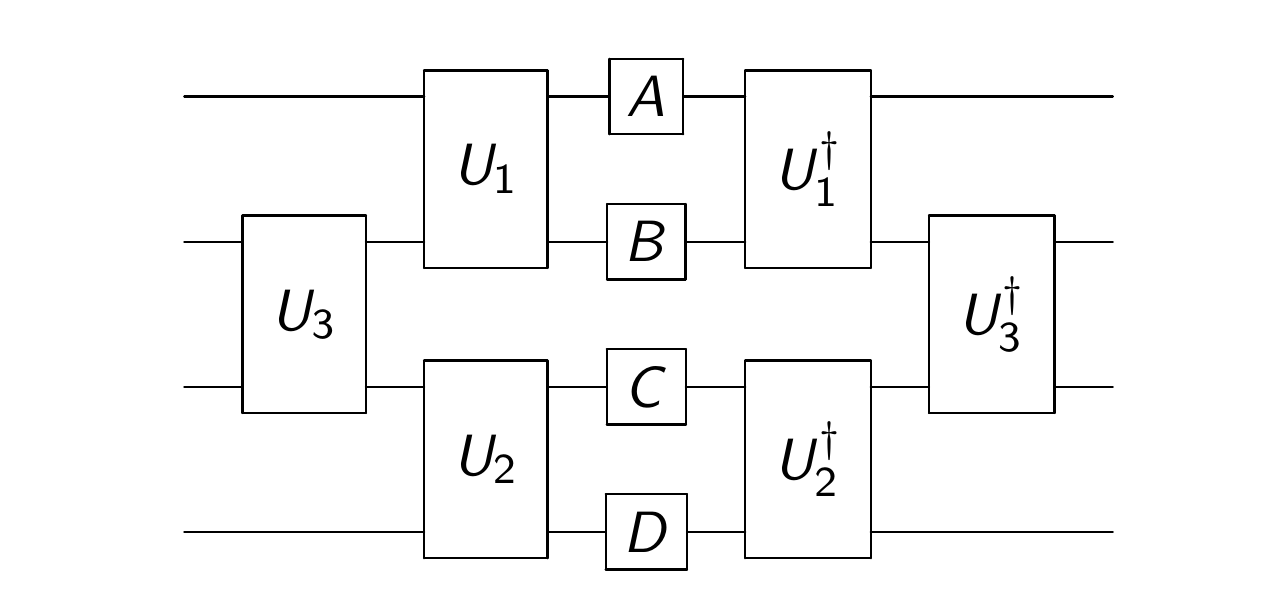

## Creating 'myCircuit'

In [ ]:
circ1 = myCircuit(1)
visualizeTN([circ1.getRTNI_string(),1])

### Creating a Mathematika String of myCircuit

In [ ]:
myCircArray = circ1.getRTNI_string()
RTNx.mathematikaString(myCircArray)

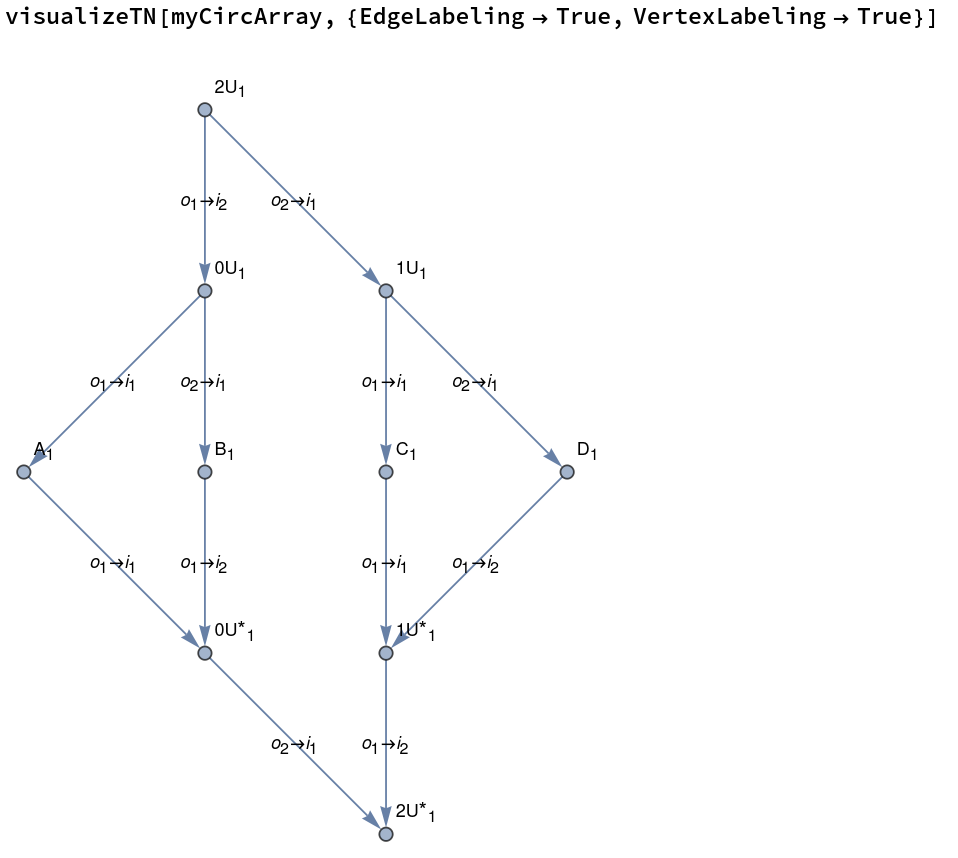

## Connecting 2 Circuits

In [ ]:
circ2 = myCircuit(2)
cirCon = Circuit.connectCircuit(circ1,circ2)
circConArray = cirCon.getRTNI_string()
circConArray

In [ ]:
cirCon.closeCircuit()
IntegratedCircArray = cirCon.getIntegratedRTNI_array()
IntegratedCircArray

# Creating a Circ2U-w-d circuit

## Circ2U-w-d Function

In [ ]:
def createAndIntegrateCircuit(width,depth,boolInfo = False):
    filename = "Data/Circuit_"

    circ = Circuit(width)
    circ.fillOpenWiresAlphabetically(1)

    circE = Circuit(width)
    circE.fillOpenWiresAlphabetically(2)

    filename = filename + "Ato" + Circuit.getWireName(width-1)+"_"+ str(depth) + ".txt"


    for i in range(depth):
        startingWire = i%2
        while startingWire  < width:
            startingWirePlus = (startingWire+1)%width
            wireName1 = Circuit.getWireName(startingWire)
            wireName2 = Circuit.getWireName(startingWirePlus)

            uName  =  wireName1+wireName2+ str(i+1)+"_U"
            errName  =  wireName1+wireName2+ str(i+1)+"_E"
            errSName = errName+"*"

            #circ------------------
            newU,newUs     = circ.add_U_node(uName,1,[2,2],[2,2],4)
            circ.connectGateToWire(newU,[startingWire,startingWirePlus])
            circ.connectWireToGate(newUs,[startingWire,startingWirePlus])


            #circE-------------------
            newU_E,newUs_E = circ.add_U_node(uName,2,[2,2],[2,2],4)
            errNode = circE.add_node(errName,2)
            errSNode = circE.add_node(errSName,2)

            circE.connectGateToWire(errNode ,[startingWire,startingWirePlus])
            circE.connectGateToWire(newU_E    ,[startingWire,startingWirePlus])

            circE.connectWireToGate(errSNode,[startingWire,startingWirePlus])
            circE.connectWireToGate(newUs_E   ,[startingWire,startingWirePlus])

            startingWire += 2


    connectedCircuit = Circuit.connectCircuit(circ, circE)
    connectedCircuit.closeCircuit()
    integratedCircArray = connectedCircuit.getIntegratedRTNI_array()
    # for i in integratedCircArray:
        # print(i)
        # print(RTNx.mathematikaString(str(i)))
    # print(integratedCircArray)

    # print()
    print("Saved in file: " + filename)
    with open(filename, "wb") as fp:   #Pickling
        pickle.dump(integratedCircArray, fp)

    return integratedCircArray

In [ ]:
circ2U43 = createAndIntegrateCircuit(4,3)
AnalyzedObject = mathemathikaFunction(circ2U43)
#usedFactor = AnalyzedObject.usedFactor
#AnalyzedTN = AnalyzedObject.AnalyzedTN
#pArr = AnalyzedObject.pArr

## Analysing the Circ2U-w-d Circuit

In [ ]:
AnalyzedObject.createSum()